In [1]:
#we're going to use the Requests python module, which is a simple library that supports HTTP. 
# https://docs.python-requests.org/en/latest/
# so let's first import the library

import requests

In [2]:
# the form of the basic call is 

# `requests.get(URL)`

# let's use a simple webpage call to see how it works

requests.get("http://www.example.com/")

<Response [200]>

In [3]:
# without storing the response object in a variable, it just outputs the first attribute listed, 
# which is a http response status code.  in this case, 200 means the request succeeded
# let's run that get request again, but this time store it in a variable

response = requests.get("http://www.example.com/")

In [4]:
# now we can look at the methods available to us using dot notation

# `response. /tab`

# and, let's just select `text` to see what was stored.
response.text

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    <

In [5]:
# we can look at the headers to discover a little more about the object
response.headers

{'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Age': '495239', 'Cache-Control': 'max-age=604800', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Wed, 19 Jan 2022 17:14:28 GMT', 'Etag': '"3147526947"', 'Expires': 'Wed, 26 Jan 2022 17:14:28 GMT', 'Last-Modified': 'Thu, 17 Oct 2019 07:18:26 GMT', 'Server': 'ECS (oxr/8325)', 'Vary': 'Accept-Encoding', 'X-Cache': 'HIT', 'Content-Length': '648'}

In [6]:
response.content

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

In [7]:
response.url

'http://www.example.com/'

In [8]:
# now that we've used Requests to obtain an unstructured response, let's see how we can use it to 
# request a structured object from an API, specifically the Zenodo API

The Zenodo REST API supports
- Deposit — upload and publishing of research outputs (identical to functionality available in the user interface).
- Records — search published records.
- Files — download/upload of files.

Zenodo's [quickstart guide](https://developers.zenodo.org/#quickstart-upload), which is the first thing on the page when looking at their documentation, describes how to upload, which requires a key.  We want to download, so we need to [jump to that section](https://developers.zenodo.org/#records) to find the URL structure we need to make an API records call.  Actually, the reference is buried a little in the documentation.  This is a good example of why you should familiarize yourself with an API's documentation prior to jumping right in.

The structure is

`GET /api/records/`

so our requests query will be 

In [9]:
response = requests.get("https://zenodo.org/api/records")

In [10]:
# we know from the developer documentation that the call returns a json object, 
# so to see the contents of the object we use
response.json()

{'aggregations': {'access_right': {'buckets': [{'doc_count': 2211532,
     'key': 'open'},
    {'doc_count': 48292, 'key': 'closed'},
    {'doc_count': 6798, 'key': 'restricted'},
    {'doc_count': 1066, 'key': 'embargoed'}],
   'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0},
  'file_type': {'buckets': [{'doc_count': 1006835, 'key': 'pdf'},
    {'doc_count': 373721, 'key': 'jpg'},
    {'doc_count': 369279, 'key': 'png'},
    {'doc_count': 235585, 'key': 'html'},
    {'doc_count': 112048, 'key': 'zip'},
    {'doc_count': 26914, 'key': 'xlsx'},
    {'doc_count': 23422, 'key': 'txt'},
    {'doc_count': 19986, 'key': 'docx'},
    {'doc_count': 19534, 'key': 'csv'},
    {'doc_count': 17985, 'key': 'xml'}],
   'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 152027},
  'keywords': {'buckets': [{'doc_count': 913764, 'key': 'Taxonomy'},
    {'doc_count': 912603, 'key': 'Biodiversity'},
    {'doc_count': 572153, 'key': 'Animalia'},
    {'doc_count': 441555, 'key': 'Ar

In [11]:
# The data in the object is structured, but can end up being quite large, so let's use a dataframe 
# to help view the content

import pandas as pd

In [12]:
pd.DataFrame(response)

,0
0,"b'{""aggregations"":{""access_right"":{""buckets"":[..."
1,"b'798,""key"":""restricted""},{""doc_count"":1066,""k..."
2,"b'e"":{""buckets"":[{""doc_count"":1006835,""key"":""p..."
3,"b'235585,""key"":""html""},{""doc_count"":112048,""ke..."
4,"b'nt"":19986,""key"":""docx""},{""doc_count"":19534,""..."
...,...
290,"b'producible metaviromis analyses"",""version"":""..."
291,"b'""unique_views"":0.0,""version_downloads"":230.0..."
292,"b'ersion_volume"":711037539557.0,""views"":0.0,""v..."
293,"b'{""next"":""https://zenodo.org/api/records/?sor..."


In [13]:
#  oops, we put the whole response into the dataframe, when we actually just want the JSON structured data

pd.DataFrame(response.json())

,aggregations,hits,links
access_right,"{'buckets': [{'doc_count': 2211532, 'key': 'op...",NaN,NaN
file_type,"{'buckets': [{'doc_count': 1006835, 'key': 'pd...",NaN,NaN
keywords,"{'buckets': [{'doc_count': 913764, 'key': 'Tax...",NaN,NaN
type,"{'buckets': [{'doc_count': 1272953, 'key': 'pu...",NaN,NaN
hits,NaN,"[{'conceptdoi': '10.5281/zenodo.5879356', 'con...",NaN
total,NaN,2267688,NaN
next,NaN,NaN,https://zenodo.org/api/records/?sort=mostrecen...
self,NaN,NaN,https://zenodo.org/api/records/?sort=mostrecen...


In [14]:
# still not what we want
# talk about difficulty of working with JSON objects

In [15]:
output = response.json()

In [22]:
# To more easily see what data we want to extract, let's take a look at each element of the JSON output
import pprint

pp = pprint.PrettyPrinter()
for key, value in output.items():
    print(f'"{key}": \n')
    pp.pprint(value)

"aggregations": 

{'access_right': {'buckets': [{'doc_count': 2211532, 'key': 'open'},
                              {'doc_count': 48292, 'key': 'closed'},
                              {'doc_count': 6798, 'key': 'restricted'},
                              {'doc_count': 1066, 'key': 'embargoed'}],
                  'doc_count_error_upper_bound': 0,
                  'sum_other_doc_count': 0},
 'file_type': {'buckets': [{'doc_count': 1006835, 'key': 'pdf'},
                           {'doc_count': 373721, 'key': 'jpg'},
                           {'doc_count': 369279, 'key': 'png'},
                           {'doc_count': 235585, 'key': 'html'},
                           {'doc_count': 112048, 'key': 'zip'},
                           {'doc_count': 26914, 'key': 'xlsx'},
                           {'doc_count': 23422, 'key': 'txt'},
                           {'doc_count': 19986, 'key': 'docx'},
                           {'doc_count': 19534, 'key': 'csv'},
                           

                     'version_unique_views': 0.0,
                     'version_views': 0.0,
                     'version_volume': 0.0,
                     'views': 0.0,
                     'volume': 0.0},
           'updated': '2022-01-19T17:08:32.077011+00:00'},
          {'conceptdoi': '10.5281/zenodo.5879337',
           'conceptrecid': '5879337',
           'created': '2022-01-19T17:07:07.442013+00:00',
           'doi': '10.5281/zenodo.5879338',
           'files': [{'bucket': '48bf7784-a3c7-44e3-9901-2600e5b6fcb1',
                      'checksum': 'md5:69c07613b55c508046eb553e357fcbd2',
                      'key': 'Francia-Nathalie Jammet.pdf',
                      'links': {'self': 'https://zenodo.org/api/files/48bf7784-a3c7-44e3-9901-2600e5b6fcb1/Francia-Nathalie%20Jammet.pdf'},
                      'size': 82826,
                      'type': 'pdf'}],
           'id': 5879338,
           'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5879338.svg',
    

                                      'orcid': '0000-0001-7103-2788'},
                                     {'affiliation': 'Politecnico di Milano',
                                      'name': 'Cremonesi, Paolo',
                                      'orcid': '0000-0002-1253-8081'}],
                        'description': 'This repository contains the source '
                                       'code and data used in our experiments '
                                       'described in the paper "An evaluation '
                                       'of Generative Adversarial Networks for '
                                       'Collaborative Filtering". Refer to the '
                                       'README file to run our experiments.',
                        'doi': '10.5281/zenodo.5879345',
                        'keywords': ['evaluation',
                                     'collaborative-filtering',
                                     'generative-adversarial-ne

In [16]:
## MB: Perhaps remove in favor of above cell
output.values()

dict_values([{'access_right': {'buckets': [{'doc_count': 2183045, 'key': 'open'}, {'doc_count': 47454, 'key': 'closed'}, {'doc_count': 6591, 'key': 'restricted'}, {'doc_count': 1400, 'key': 'embargoed'}], 'doc_count_error_upper_bound': 0, 'sum_other_doc_count': 0}, 'file_type': {'buckets': [{'doc_count': 995671, 'key': 'pdf'}, {'doc_count': 371757, 'key': 'jpg'}, {'doc_count': 362715, 'key': 'png'}, {'doc_count': 231468, 'key': 'html'}, {'doc_count': 110410, 'key': 'zip'}, {'doc_count': 26395, 'key': 'xlsx'}, {'doc_count': 23042, 'key': 'txt'}, {'doc_count': 19256, 'key': 'docx'}, {'doc_count': 18879, 'key': 'csv'}, {'doc_count': 17926, 'key': 'xml'}], 'doc_count_error_upper_bound': 0, 'sum_other_doc_count': 149126}, 'keywords': {'buckets': [{'doc_count': 906874, 'key': 'Taxonomy'}, {'doc_count': 905692, 'key': 'Biodiversity'}, {'doc_count': 566792, 'key': 'Animalia'}, {'doc_count': 437668, 'key': 'Arthropoda'}, {'doc_count': 298167, 'key': 'Insecta'}, {'doc_count': 270753, 'key': 'Ter

In [17]:
 output['aggregations']

{'access_right': {'buckets': [{'doc_count': 2183045, 'key': 'open'},
   {'doc_count': 47454, 'key': 'closed'},
   {'doc_count': 6591, 'key': 'restricted'},
   {'doc_count': 1400, 'key': 'embargoed'}],
  'doc_count_error_upper_bound': 0,
  'sum_other_doc_count': 0},
 'file_type': {'buckets': [{'doc_count': 995671, 'key': 'pdf'},
   {'doc_count': 371757, 'key': 'jpg'},
   {'doc_count': 362715, 'key': 'png'},
   {'doc_count': 231468, 'key': 'html'},
   {'doc_count': 110410, 'key': 'zip'},
   {'doc_count': 26395, 'key': 'xlsx'},
   {'doc_count': 23042, 'key': 'txt'},
   {'doc_count': 19256, 'key': 'docx'},
   {'doc_count': 18879, 'key': 'csv'},
   {'doc_count': 17926, 'key': 'xml'}],
  'doc_count_error_upper_bound': 0,
  'sum_other_doc_count': 149126},
 'keywords': {'buckets': [{'doc_count': 906874, 'key': 'Taxonomy'},
   {'doc_count': 905692, 'key': 'Biodiversity'},
   {'doc_count': 566792, 'key': 'Animalia'},
   {'doc_count': 437668, 'key': 'Arthropoda'},
   {'doc_count': 298167, 'key': 

It looks like the aggregations gives us information about how many results there are for our query, this could be useful!

In [22]:
output.get('hits')

{'hits': [{'conceptdoi': '10.5281/zenodo.5805007',
   'conceptrecid': '5805007',
   'created': '2021-12-26T12:50:53.713456+00:00',
   'doi': '10.5281/zenodo.5805008',
   'files': [{'bucket': '0a323768-f0ea-4eb0-af23-6f427237fad7',
     'checksum': 'md5:61d763b061b6c899762d41bc58da0c4e',
     'key': 'Ganaie_01_01_p9-14.pdf',
     'links': {'self': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7/Ganaie_01_01_p9-14.pdf'},
     'size': 483367,
     'type': 'pdf'}],
   'id': 5805008,
   'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805008.svg',
    'bucket': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7',
    'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805007.svg',
    'conceptdoi': 'https://doi.org/10.5281/zenodo.5805007',
    'doi': 'https://doi.org/10.5281/zenodo.5805008',
    'html': 'https://zenodo.org/record/5805008',
    'latest': 'https://zenodo.org/api/records/5805008',
    'latest_html': 'https://zenodo.o

In [21]:
output.get('hits').get('hits')

[{'conceptdoi': '10.5281/zenodo.5805007',
  'conceptrecid': '5805007',
  'created': '2021-12-26T12:50:53.713456+00:00',
  'doi': '10.5281/zenodo.5805008',
  'files': [{'bucket': '0a323768-f0ea-4eb0-af23-6f427237fad7',
    'checksum': 'md5:61d763b061b6c899762d41bc58da0c4e',
    'key': 'Ganaie_01_01_p9-14.pdf',
    'links': {'self': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7/Ganaie_01_01_p9-14.pdf'},
    'size': 483367,
    'type': 'pdf'}],
  'id': 5805008,
  'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805008.svg',
   'bucket': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7',
   'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805007.svg',
   'conceptdoi': 'https://doi.org/10.5281/zenodo.5805007',
   'doi': 'https://doi.org/10.5281/zenodo.5805008',
   'html': 'https://zenodo.org/record/5805008',
   'latest': 'https://zenodo.org/api/records/5805008',
   'latest_html': 'https://zenodo.org/record/5805008',
   'sel

In [23]:
output

{'aggregations': {'access_right': {'buckets': [{'doc_count': 2183045,
     'key': 'open'},
    {'doc_count': 47454, 'key': 'closed'},
    {'doc_count': 6591, 'key': 'restricted'},
    {'doc_count': 1400, 'key': 'embargoed'}],
   'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0},
  'file_type': {'buckets': [{'doc_count': 995671, 'key': 'pdf'},
    {'doc_count': 371757, 'key': 'jpg'},
    {'doc_count': 362715, 'key': 'png'},
    {'doc_count': 231468, 'key': 'html'},
    {'doc_count': 110410, 'key': 'zip'},
    {'doc_count': 26395, 'key': 'xlsx'},
    {'doc_count': 23042, 'key': 'txt'},
    {'doc_count': 19256, 'key': 'docx'},
    {'doc_count': 18879, 'key': 'csv'},
    {'doc_count': 17926, 'key': 'xml'}],
   'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 149126},
  'keywords': {'buckets': [{'doc_count': 906874, 'key': 'Taxonomy'},
    {'doc_count': 905692, 'key': 'Biodiversity'},
    {'doc_count': 566792, 'key': 'Animalia'},
    {'doc_count': 437668, 'key': 'Art

## Note
MB: Talk about being careful when flattening JSON to DataFrame. This can massively balloon up the DF & create a predominantly sparse object. 

In [20]:
# we're going to use a package to flatten the json, so we can work with it.
# https://anaconda.org/conda-forge/flatten_json
# it should have already been installed.  The other libraries we use can be installed using the
# anaconda interface, but we need to install this one using
# `conda install -c conda-forge flatten_json`
# from the command line

from flatten_json import flatten

In [24]:
[flatten(result) for result in output['hits']['hits']]

[{'conceptdoi': '10.5281/zenodo.5805007',
  'conceptrecid': '5805007',
  'created': '2021-12-26T12:50:53.713456+00:00',
  'doi': '10.5281/zenodo.5805008',
  'files_0_bucket': '0a323768-f0ea-4eb0-af23-6f427237fad7',
  'files_0_checksum': 'md5:61d763b061b6c899762d41bc58da0c4e',
  'files_0_key': 'Ganaie_01_01_p9-14.pdf',
  'files_0_links_self': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7/Ganaie_01_01_p9-14.pdf',
  'files_0_size': 483367,
  'files_0_type': 'pdf',
  'id': 5805008,
  'links_badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805008.svg',
  'links_bucket': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7',
  'links_conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805007.svg',
  'links_conceptdoi': 'https://doi.org/10.5281/zenodo.5805007',
  'links_doi': 'https://doi.org/10.5281/zenodo.5805008',
  'links_html': 'https://zenodo.org/record/5805008',
  'links_latest': 'https://zenodo.org/api/records/5805008',
  'links_latest_

In [26]:
output['hits']['hits']

[{'conceptdoi': '10.5281/zenodo.5805007',
  'conceptrecid': '5805007',
  'created': '2021-12-26T12:50:53.713456+00:00',
  'doi': '10.5281/zenodo.5805008',
  'files': [{'bucket': '0a323768-f0ea-4eb0-af23-6f427237fad7',
    'checksum': 'md5:61d763b061b6c899762d41bc58da0c4e',
    'key': 'Ganaie_01_01_p9-14.pdf',
    'links': {'self': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7/Ganaie_01_01_p9-14.pdf'},
    'size': 483367,
    'type': 'pdf'}],
  'id': 5805008,
  'links': {'badge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805008.svg',
   'bucket': 'https://zenodo.org/api/files/0a323768-f0ea-4eb0-af23-6f427237fad7',
   'conceptbadge': 'https://zenodo.org/badge/doi/10.5281/zenodo.5805007.svg',
   'conceptdoi': 'https://doi.org/10.5281/zenodo.5805007',
   'doi': 'https://doi.org/10.5281/zenodo.5805008',
   'html': 'https://zenodo.org/record/5805008',
   'latest': 'https://zenodo.org/api/records/5805008',
   'latest_html': 'https://zenodo.org/record/5805008',
   'sel

In [27]:
output_list = output['hits']['hits']

In [28]:
pd.DataFrame(output_list)

,conceptdoi,conceptrecid,created,doi,files,id,links,metadata,owners,revision,stats,updated
0,10.5281/zenodo.5805007,5805007,2021-12-26T12:50:53.713456+00:00,10.5281/zenodo.5805008,[{'bucket': '0a323768-f0ea-4eb0-af23-6f427237f...,5805008,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[277132],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:50:55.237253+00:00
1,10.5281/zenodo.5805023,5805023,2021-12-26T12:42:15.058584+00:00,10.5281/zenodo.5805024,[{'bucket': 'b9371642-f78e-47fc-846a-62321cae5...,5805024,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[277503],4,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:47:53.343894+00:00
2,10.5281/zenodo.5805021,5805021,2021-12-26T12:40:26.245956+00:00,10.5281/zenodo.5805022,[{'bucket': 'b1751961-e1d4-4b16-95dc-6165ed531...,5805022,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[155121],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:40:27.443713+00:00
3,10.5281/zenodo.5805017,5805017,2021-12-26T12:37:24.199727+00:00,10.5281/zenodo.5805018,[{'bucket': '8c49de7e-509f-401f-a500-221011330...,5805018,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[155121],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:37:25.329251+00:00
4,10.5281/zenodo.5805015,5805015,2021-12-26T12:33:54.420981+00:00,10.5281/zenodo.5805016,[{'bucket': 'a9dc207f-8549-4956-84b1-d2137cee7...,5805016,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[155121],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:33:55.548874+00:00
5,10.5281/zenodo.5805013,5805013,2021-12-26T12:29:56.740346+00:00,10.5281/zenodo.5805014,[{'bucket': 'b3d11ed1-1ee2-4746-b6b7-8264681fa...,5805014,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[155121],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:29:58.017631+00:00
6,10.5281/zenodo.5805011,5805011,2021-12-26T12:26:44.245048+00:00,10.5281/zenodo.5805012,[{'bucket': '37e772f8-26e5-44f1-8a7c-1fb49fbaa...,5805012,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[155121],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:26:45.210086+00:00
7,10.5281/zenodo.5804967,5804967,2021-12-26T12:23:52.288286+00:00,10.5281/zenodo.5804968,NaN,5804968,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'embargoed', 'access_right_ca...",[208200],2,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:24:14.082920+00:00
8,10.5281/zenodo.5805009,5805009,2021-12-26T12:22:57.014557+00:00,10.5281/zenodo.5805010,[{'bucket': '4dabc3e3-d0dc-4a9d-baef-1c5deab87...,5805010,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[155121],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:22:57.984464+00:00
9,10.5281/zenodo.5805005,5805005,2021-12-26T12:16:58.803650+00:00,10.5281/zenodo.5805006,[{'bucket': '1ebed2fb-3b97-43ca-993d-f8eff79d5...,5805006,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[155121],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:16:59.785560+00:00


In [30]:
output_df = pd.DataFrame(output_list)

In [38]:
# now let's try adding additional search parameters
# https://developers.zenodo.org/#list36

In [39]:
response = requests.get('https://zenodo.org/api/records',
                        params={'q': 'data science'})

In [40]:
response.json()

{'aggregations': {'access_right': {'buckets': [{'doc_count': 369255,
     'key': 'open'},
    {'doc_count': 23217, 'key': 'closed'},
    {'doc_count': 3658, 'key': 'restricted'},
    {'doc_count': 584, 'key': 'embargoed'}],
   'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0},
  'file_type': {'buckets': [{'doc_count': 167979, 'key': 'pdf'},
    {'doc_count': 52328, 'key': 'html'},
    {'doc_count': 40639, 'key': 'zip'},
    {'doc_count': 25464, 'key': 'png'},
    {'doc_count': 21288, 'key': 'jpg'},
    {'doc_count': 20626, 'key': 'xlsx'},
    {'doc_count': 16664, 'key': 'txt'},
    {'doc_count': 14986, 'key': 'csv'},
    {'doc_count': 9845, 'key': 'docx'},
    {'doc_count': 5564, 'key': 'gz'}],
   'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 66726},
  'keywords': {'buckets': [{'doc_count': 99595, 'key': 'Taxonomy'},
    {'doc_count': 99442, 'key': 'Biodiversity'},
    {'doc_count': 92303, 'key': 'Animalia'},
    {'doc_count': 69295, 'key': 'Arthropoda'},
   

In [41]:
# and what we developed earlier is something that we want to repeat, so let's go ahead and create a function
# so it's easy for us to reuse this

In [42]:
def get_zenodo_search_output():
    # Remember to add a docstring when you create a function so other users know what 
    # to expect when using your code!
    """Return the output for a Zenodo record query.
    
    Returns
    -------
    output_df : pandas.DataFrame
    """
    # Reminder: Add a newline between your multiline docstring and your first line of code!
    
    response = requests.get("https://zenodo.org/api/records")
    output = response.json()
    output_list = output['hits']['hits']
    output_df = pd.DataFrame(output_list)
    
    return output_df

In [43]:
get_zenodo_search_output()

,conceptdoi,conceptrecid,created,doi,files,id,links,metadata,owners,revision,stats,updated
0,10.5281/zenodo.5805033,5805033,2021-12-26T13:33:25.961963+00:00,10.5281/zenodo.5805034,[{'bucket': '72ec6ad7-63a5-43f4-9477-a7ff81f29...,5805034,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[275506],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:33:26.947107+00:00
1,10.5281/zenodo.4884614,4884614,2021-12-26T13:32:51.771532+00:00,10.5281/zenodo.5805040,[{'bucket': '4bed67e4-af98-4d65-96f1-b67e21f4c...,5805040,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[54906],2,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:32:54.888929+00:00
2,10.5281/zenodo.5805037,5805037,2021-12-26T13:32:39.789471+00:00,10.5281/zenodo.5805038,[{'bucket': '7cf03d1e-c728-4425-9e85-8a5defe17...,5805038,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[258561],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:32:40.802822+00:00
3,10.5281/zenodo.4852391,4852391,2021-12-26T13:28:52.454274+00:00,10.5281/zenodo.5805039,[{'bucket': '6ca95753-e478-4a70-a009-6e793fdd7...,5805039,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[208509],2,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:29:02.979633+00:00
4,10.5281/zenodo.5805035,5805035,2021-12-26T13:28:01.557335+00:00,10.5281/zenodo.5805036,[{'bucket': '8ff046e0-69fa-4e52-ae8f-d5298a382...,5805036,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[258561],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:28:02.539945+00:00
5,10.5281/zenodo.5805031,5805031,2021-12-26T13:25:15.450771+00:00,10.5281/zenodo.5805032,[{'bucket': 'c3d7512d-4cfa-4c29-bc8d-77b3f18b7...,5805032,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[258561],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:25:16.472567+00:00
6,10.5281/zenodo.5805027,5805027,2021-12-26T13:15:28.546636+00:00,10.5281/zenodo.5805028,[{'bucket': 'c54f8f85-e8ba-4d2c-95b6-5cf4214f6...,5805028,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[258561],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:15:29.751657+00:00
7,10.5281/zenodo.5805029,5805029,2021-12-26T13:14:38.046226+00:00,10.5281/zenodo.5805030,[{'bucket': 'c0fe4031-2ac0-468d-9091-7e4dfba21...,5805030,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[276740],2,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:14:39.258691+00:00
8,10.5281/zenodo.5805025,5805025,2021-12-26T13:08:18.231477+00:00,10.5281/zenodo.5805026,[{'bucket': 'b326a866-550c-48bf-9282-d6330fb8f...,5805026,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[258561],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T13:08:19.211289+00:00
9,10.5281/zenodo.5805007,5805007,2021-12-26T12:50:53.713456+00:00,10.5281/zenodo.5805008,[{'bucket': '0a323768-f0ea-4eb0-af23-6f427237f...,5805008,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[277132],1,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-12-26T12:50:55.237253+00:00


## MB: We should walk through the API documentation some time before this so we can show them how we know what parameters to be using

In [44]:
# and let's add an argument to the function so we can change the search string

def get_zenodo_search_output(search_term):
    # Now that we require parameters, we need the docstring to reflect that.
    # Side note: there are many different docstring formats in python, this is 
    # the numpy standard.
    """Returns the output for a Zenodo record query.
    
    Parameters
    ----------
    # Parameters are formatted as
    # variable name : variable type
    #     Sentence description of variable.
    
    search_term : str
        The phrase we want to query records for.
        
    Returns
    -------
    output_df : pandas.DataFrame
    """
    
    # Since we specified that we want a string search_term, make sure the search_term
    # is actually a string
    # There are a different ways to do this in python, but the recommended way is isinstance()
    assert isinstance(search_term, str), f"search_term variable must be a str, not {type(search_term)}"
    
    response = requests.get('https://zenodo.org/api/records',
                        params={'q': search_term})
    output = response.json()
    output_list = output['hits']['hits']
    output_df = pd.DataFrame(output_list)
    
    return output_df

In [46]:
get_zenodo_search_output('data science')

,conceptdoi,conceptrecid,created,doi,files,id,links,metadata,owners,revision,stats,updated
0,10.5281/zenodo.5231712,5231712,2021-08-21T22:18:04.290476+00:00,10.5281/zenodo.5231713,[{'bucket': '37198b64-2308-432c-9a29-7c1eed15c...,5231713,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[249271],4,"{'downloads': 2.0, 'unique_downloads': 2.0, 'u...",2021-08-22T21:28:14.749629+00:00
1,10.5281/zenodo.3662455,3662455,2020-05-04T13:59:12.793194+00:00,10.5281/zenodo.3662456,[{'bucket': '0ba07c48-f33b-4c41-9e9b-d7d5ba3d4...,3662456,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[61826],3,"{'downloads': 43.0, 'unique_downloads': 40.0, ...",2020-05-04T20:20:24.637163+00:00
2,10.5281/zenodo.3662462,3662462,2020-05-04T14:03:02.223573+00:00,10.5281/zenodo.3662463,[{'bucket': '7d3533ef-42dd-44c3-95ea-c2ce3593a...,3662463,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[61826],3,"{'downloads': 33.0, 'unique_downloads': 30.0, ...",2020-05-04T20:20:24.646145+00:00
3,NaN,641603,2014-03-10T17:37:52+00:00,10.5281/zenodo.7093,[{'bucket': 'dc377ae6-2727-4f71-9838-adacdc3ed...,7093,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[],10,"{'downloads': 69.0, 'unique_downloads': 66.0, ...",2020-01-24T19:24:54.399978+00:00
4,10.5281/zenodo.3527980,3527980,2019-11-04T12:10:02.281099+00:00,10.5281/zenodo.3527981,[{'bucket': '414658c5-7a80-48e3-bb06-689962852...,3527981,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[81880],2,"{'downloads': 9.0, 'unique_downloads': 9.0, 'u...",2020-01-20T16:44:06.647993+00:00
5,10.5281/zenodo.5259955,5259955,2021-11-11T04:52:08.554421+00:00,10.5281/zenodo.5673807,[{'bucket': '18c3244b-09b3-439d-83c7-cb9e83696...,5673807,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[249582],3,"{'downloads': 1.0, 'unique_downloads': 1.0, 'u...",2021-11-11T13:49:20.392938+00:00
6,10.5281/zenodo.5456929,5456929,2021-09-05T06:41:25.670831+00:00,10.5281/zenodo.5456930,[{'bucket': 'c98060c8-4fe6-4529-a047-bf627b809...,5456930,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[1161],3,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-09-09T01:27:01.850605+00:00
7,10.5281/zenodo.3858477,3858477,2020-05-27T00:47:44.927351+00:00,10.5281/zenodo.3858478,[{'bucket': '45481373-959c-482c-9fdb-4bf7dc849...,3858478,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[99031],4,"{'downloads': 8.0, 'unique_downloads': 8.0, 'u...",2020-05-27T20:20:33.781652+00:00
8,10.5281/zenodo.3923032,3923032,2020-07-03T16:45:05.523782+00:00,10.5281/zenodo.3923033,[{'bucket': 'c4c263ba-5758-47bb-b349-0648e897b...,3923033,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[69124],2,"{'downloads': 100.0, 'unique_downloads': 92.0,...",2020-07-04T00:59:18.989977+00:00
9,10.5281/zenodo.3775664,3775664,2020-04-29T12:50:46.325995+00:00,10.5281/zenodo.3775665,[{'bucket': 'dbcd9979-2b31-4865-b2dc-0c7c83ae3...,3775665,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[87077],3,"{'downloads': 8.0, 'unique_downloads': 8.0, 'u...",2021-04-12T04:23:02.200123+00:00


In [47]:
# what if the search term is accidentally mistyped
get_zenodo_search_output('dataafdljas')

""


In [50]:
# well, that's not useful.  Let's put a conditional statement in so we avoid that
# and let's add an argument to the function so we can change the search string

def get_zenodo_search_output(search_term):
    """Returns the output for a Zenodo record query.
    
    Parameters
    ----------
    # Parameters are formatted as
    # variable name : variable type
    #     Sentence description of variable.
    
    search_term : str
        The phrase we want to query records for.
        
    Returns
    -------
    output_df : pandas.DataFrame
    """
    
    # Since we specified that we want a string search_term, make sure the search_term
    # is actually a string
    # There are a different ways to do this in python, but the recommended way is isinstance()
    assert isinstance(search_term, str), f"search_term variable must be a str, not {type(search_term)}"
    
    # let's make sure there's always a dataframe to return
    search_df = pd.DataFrame()
    
    response = requests.get('https://zenodo.org/api/records',
                        params={'q': search_term})
    output = response.json()

    # and while we're at it, we should make sure the response code is okay
    if response.status_code == 200 and output.get('hits').get('hits'):
        output_list = output['hits']['hits']
        output_df = pd.DataFrame(output_list)
        
        # what we're doing here is setting it up so this if statement will eventually become a 
        # loop, and the search_df will capture all of the output
        #
        # The pd.concat function will stack the two provided DataFrames on top of each other.
        # Since each DataFrame has is own indexing, concatenating them means that some indices could repeat.
        # The reset_index() function ensures that we don't have repeated indices, but adds the original 
        # indices as a new column. The drop=True argument removes that column.
        search_df = pd.concat([search_df, output_df]).reset_index(drop=True)
    
    return search_df

In [51]:
# let's try the error input first
get_zenodo_search_output('dataafdljas')

""


In [52]:
get_zenodo_search_output('data science')

,conceptdoi,conceptrecid,created,doi,files,id,links,metadata,owners,revision,stats,updated
0,10.5281/zenodo.5231712,5231712,2021-08-21T22:18:04.290476+00:00,10.5281/zenodo.5231713,[{'bucket': '37198b64-2308-432c-9a29-7c1eed15c...,5231713,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[249271],4,"{'downloads': 2.0, 'unique_downloads': 2.0, 'u...",2021-08-22T21:28:14.749629+00:00
1,10.5281/zenodo.3662455,3662455,2020-05-04T13:59:12.793194+00:00,10.5281/zenodo.3662456,[{'bucket': '0ba07c48-f33b-4c41-9e9b-d7d5ba3d4...,3662456,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[61826],3,"{'downloads': 43.0, 'unique_downloads': 40.0, ...",2020-05-04T20:20:24.637163+00:00
2,10.5281/zenodo.3662462,3662462,2020-05-04T14:03:02.223573+00:00,10.5281/zenodo.3662463,[{'bucket': '7d3533ef-42dd-44c3-95ea-c2ce3593a...,3662463,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[61826],3,"{'downloads': 33.0, 'unique_downloads': 30.0, ...",2020-05-04T20:20:24.646145+00:00
3,NaN,641603,2014-03-10T17:37:52+00:00,10.5281/zenodo.7093,[{'bucket': 'dc377ae6-2727-4f71-9838-adacdc3ed...,7093,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[],10,"{'downloads': 69.0, 'unique_downloads': 66.0, ...",2020-01-24T19:24:54.399978+00:00
4,10.5281/zenodo.3527980,3527980,2019-11-04T12:10:02.281099+00:00,10.5281/zenodo.3527981,[{'bucket': '414658c5-7a80-48e3-bb06-689962852...,3527981,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[81880],2,"{'downloads': 9.0, 'unique_downloads': 9.0, 'u...",2020-01-20T16:44:06.647993+00:00
5,10.5281/zenodo.5259955,5259955,2021-11-11T04:52:08.554421+00:00,10.5281/zenodo.5673807,[{'bucket': '18c3244b-09b3-439d-83c7-cb9e83696...,5673807,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[249582],3,"{'downloads': 1.0, 'unique_downloads': 1.0, 'u...",2021-11-11T13:49:20.392938+00:00
6,10.5281/zenodo.5456929,5456929,2021-09-05T06:41:25.670831+00:00,10.5281/zenodo.5456930,[{'bucket': 'c98060c8-4fe6-4529-a047-bf627b809...,5456930,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[1161],3,"{'downloads': 0.0, 'unique_downloads': 0.0, 'u...",2021-09-09T01:27:01.850605+00:00
7,10.5281/zenodo.3858477,3858477,2020-05-27T00:47:44.927351+00:00,10.5281/zenodo.3858478,[{'bucket': '45481373-959c-482c-9fdb-4bf7dc849...,3858478,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[99031],4,"{'downloads': 8.0, 'unique_downloads': 8.0, 'u...",2020-05-27T20:20:33.781652+00:00
8,10.5281/zenodo.3923032,3923032,2020-07-03T16:45:05.523782+00:00,10.5281/zenodo.3923033,[{'bucket': 'c4c263ba-5758-47bb-b349-0648e897b...,3923033,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[69124],2,"{'downloads': 100.0, 'unique_downloads': 92.0,...",2020-07-04T00:59:18.989977+00:00
9,10.5281/zenodo.3775664,3775664,2020-04-29T12:50:46.325995+00:00,10.5281/zenodo.3775665,[{'bucket': 'dbcd9979-2b31-4865-b2dc-0c7c83ae3...,3775665,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[87077],3,"{'downloads': 8.0, 'unique_downloads': 8.0, 'u...",2021-04-12T04:23:02.200123+00:00


## Getting More Results

We're only getting 10 returned results, but surely a term like "data science" would have way more results, right? Let's take a look at the aggregation data we saw earlier to see how many results there really are.

In [27]:
result_categories = output['aggregations']['access_right']['buckets']
result_categories

[{'doc_count': 2211532, 'key': 'open'},
 {'doc_count': 48292, 'key': 'closed'},
 {'doc_count': 6798, 'key': 'restricted'},
 {'doc_count': 1066, 'key': 'embargoed'}]

There's surely more than 10 results, but let's sum up and see how many we can really expect

In [28]:
sum([category['doc_count'] for category in result_categories])

2267688

There's much more than 10 results, so how do we get them?

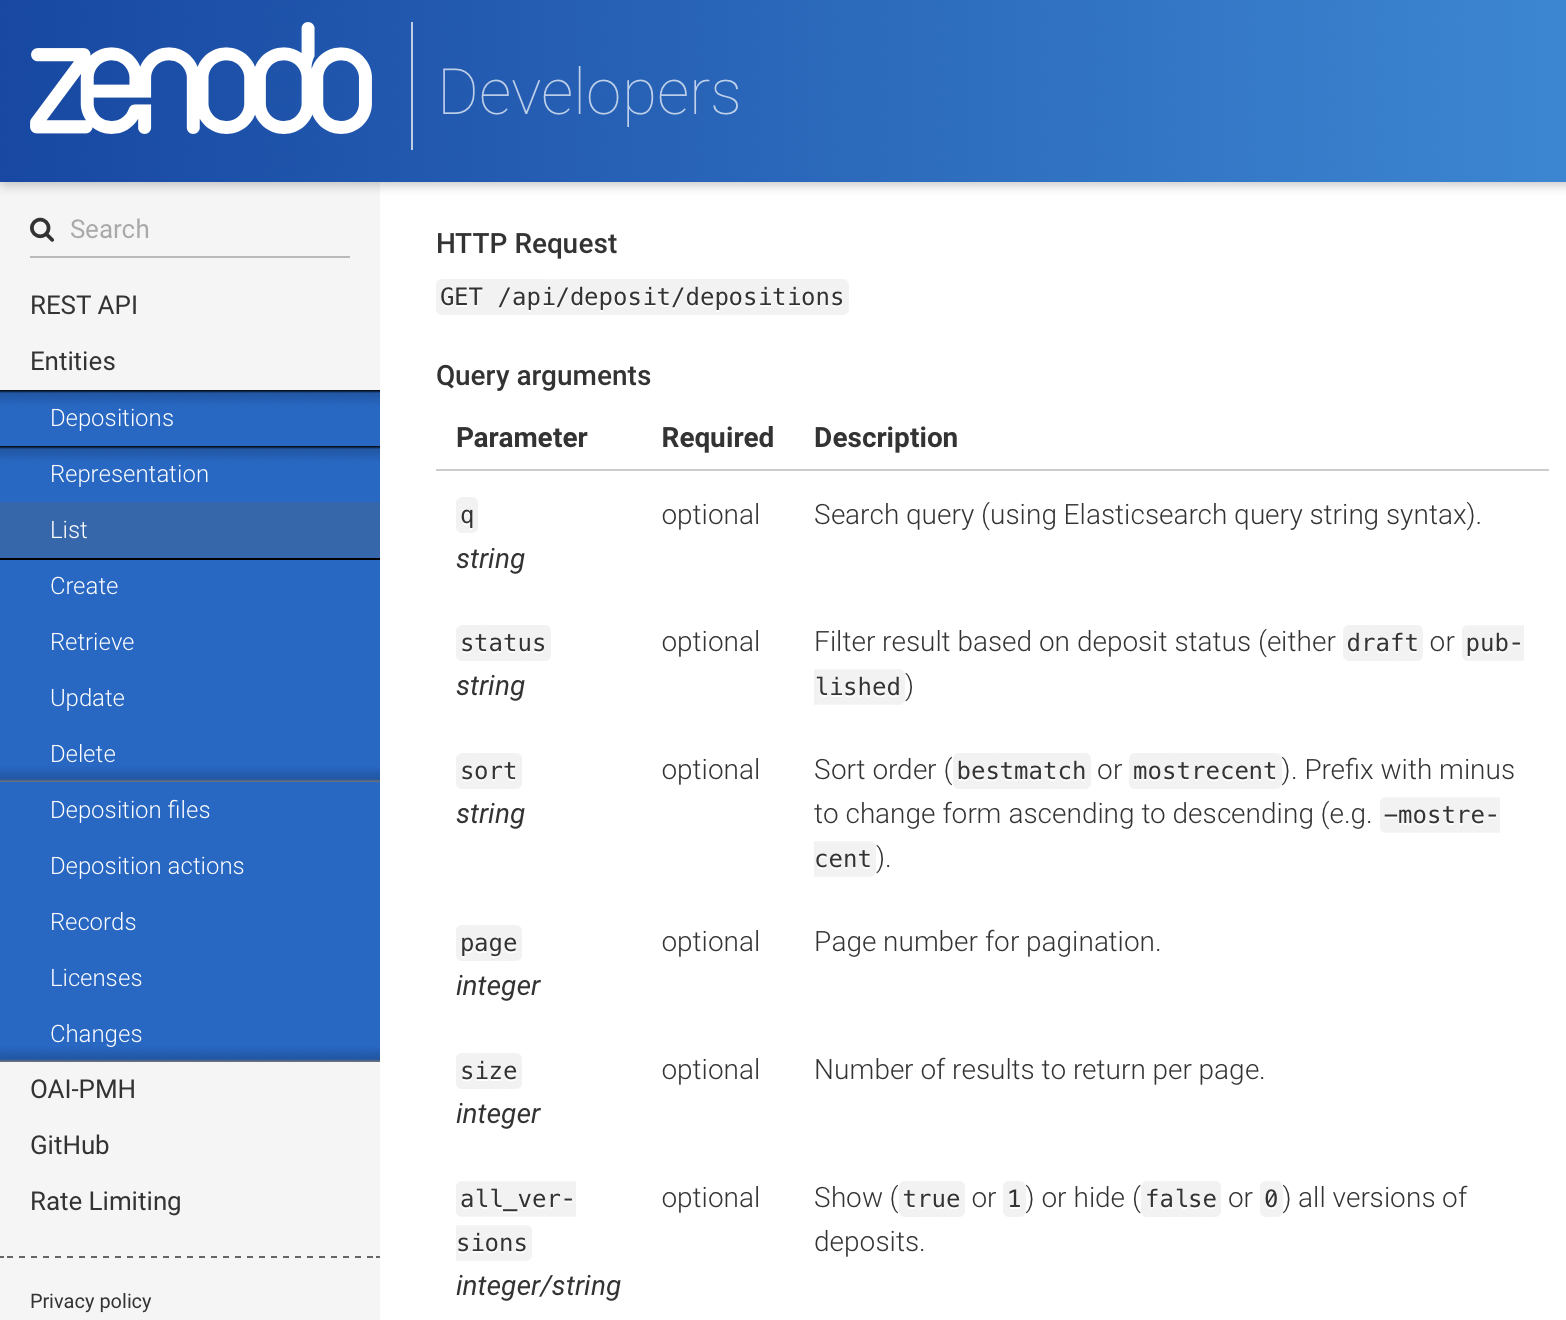

From the documentation, we see that there's a page number and a page size. Maybe that helps us get more results?

In [29]:
def get_zenodo_search_output(search_term):
    """Returns the output for a Zenodo record query.
    
    Parameters
    ----------
    # Parameters are formatted as
    # variable name : variable type
    #     Sentence description of variable.
    
    search_term : str
        The phrase we want to query records for.
        
    Returns
    -------
    output_df : pandas.DataFrame
    """
    
    # Since we specified that we want a string search_term, make sure the search_term
    # is actually a string
    # There are a different ways to do this in python, but the recommended way is isinstance()
    assert isinstance(search_term, str), f"search_term variable must be a str, not {type(search_term)}"
    
    # let's make sure there's always a dataframe to return
    search_df = pd.DataFrame()
    
    response = requests.get('https://zenodo.org/api/records',
                        params={'q': search_term,
                               'size': 100})
    output = response.json()

    # and while we're at it, we should make sure the response code is okay
    if response.status_code == 200 and output.get('hits').get('hits'):
        output_list = output['hits']['hits']
        output_df = pd.DataFrame(output_list)
        
        # what we're doing here is setting it up so this if statement will eventually become a 
        # loop, and the search_df will capture all of the output
        #
        # The pd.concat function will stack the two provided DataFrames on top of each other.
        # Since each DataFrame has is own indexing, concatenating them means that some indices could repeat.
        # The reset_index() function ensures that we don't have repeated indices, but adds the original 
        # indices as a new column. The drop=True argument removes that column.
        search_df = pd.concat([search_df, output_df]).reset_index(drop=True)
    
    return search_df

In [31]:
get_zenodo_search_output('data science')

,conceptdoi,conceptrecid,created,doi,files,id,links,metadata,owners,revision,stats,updated
0,10.5281/zenodo.5231712,5231712,2021-08-21T22:18:04.290476+00:00,10.5281/zenodo.5231713,[{'bucket': '37198b64-2308-432c-9a29-7c1eed15c...,5231713,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[249271],4,"{'downloads': 2.0, 'unique_downloads': 2.0, 'u...",2021-08-22T21:28:14.749629+00:00
1,10.5281/zenodo.3662462,3662462,2020-05-04T14:03:02.223573+00:00,10.5281/zenodo.3662463,[{'bucket': '7d3533ef-42dd-44c3-95ea-c2ce3593a...,3662463,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[61826],3,"{'downloads': 34.0, 'unique_downloads': 31.0, ...",2020-05-04T20:20:24.646145+00:00
2,10.5281/zenodo.3662455,3662455,2020-05-04T13:59:12.793194+00:00,10.5281/zenodo.3662456,[{'bucket': '0ba07c48-f33b-4c41-9e9b-d7d5ba3d4...,3662456,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[61826],3,"{'downloads': 44.0, 'unique_downloads': 41.0, ...",2020-05-04T20:20:24.637163+00:00
3,10.5281/zenodo.5827259,5827259,2022-01-07T13:32:34.302665+00:00,10.5281/zenodo.5827260,[{'bucket': '97b2f7c7-ce99-4499-b583-e1cdc7817...,5827260,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[238070],2,"{'downloads': 185.0, 'unique_downloads': 162.0...",2022-01-07T13:48:49.195381+00:00
4,NaN,641603,2014-03-10T17:37:52+00:00,10.5281/zenodo.7093,[{'bucket': 'dc377ae6-2727-4f71-9838-adacdc3ed...,7093,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[],10,"{'downloads': 70.0, 'unique_downloads': 67.0, ...",2020-01-24T19:24:54.399978+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.5281/zenodo.5044818,5044818,2021-07-03T04:39:57.579113+00:00,10.5281/zenodo.5044819,[{'bucket': '49d01f19-baee-4516-98de-bff9f407f...,5044819,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[192624],2,"{'downloads': 13.0, 'unique_downloads': 2.0, '...",2021-07-04T13:48:16.442714+00:00
96,10.5281/zenodo.4087811,4087811,2020-10-14T07:32:34.708817+00:00,10.5281/zenodo.4087812,[{'bucket': 'e660a819-a906-47ad-9522-5b86dd29f...,4087812,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[144022],2,"{'downloads': 44.0, 'unique_downloads': 39.0, ...",2020-10-14T12:26:55.262779+00:00
97,10.5281/zenodo.4557636,4557636,2021-04-08T07:38:36.602409+00:00,10.5281/zenodo.4662096,[{'bucket': 'b0078583-2571-4b1d-b01c-4a5d29443...,4662096,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[172280],3,"{'downloads': 145.0, 'unique_downloads': 136.0...",2021-07-07T23:39:47.336709+00:00
98,NaN,5510972,2021-09-16T04:32:52.731916+00:00,10.3897/rio.7.e71553,[{'bucket': '629e09de-9fc7-48f5-8e4d-87e14eacd...,5510973,{'badge': 'https://zenodo.org/badge/doi/10.389...,"{'access_right': 'open', 'access_right_categor...",[22270],2,"{'downloads': 13.0, 'unique_downloads': 11.0, ...",2021-09-16T13:48:23.296436+00:00


Now we're getting a lot more results! Let's see what happens when we change the page

In [32]:
def get_zenodo_search_output(search_term):
    """Returns the output for a Zenodo record query.
    
    Parameters
    ----------
    # Parameters are formatted as
    # variable name : variable type
    #     Sentence description of variable.
    
    search_term : str
        The phrase we want to query records for.
        
    Returns
    -------
    output_df : pandas.DataFrame
    """
    
    # Since we specified that we want a string search_term, make sure the search_term
    # is actually a string
    # There are a different ways to do this in python, but the recommended way is isinstance()
    assert isinstance(search_term, str), f"search_term variable must be a str, not {type(search_term)}"
    
    # let's make sure there's always a dataframe to return
    search_df = pd.DataFrame()
    
    response = requests.get('https://zenodo.org/api/records',
                        params={'q': search_term,
                               'size': 100,
                               'page': 2})
    output = response.json()

    # and while we're at it, we should make sure the response code is okay
    if response.status_code == 200 and output.get('hits').get('hits'):
        output_list = output['hits']['hits']
        output_df = pd.DataFrame(output_list)
        
        # what we're doing here is setting it up so this if statement will eventually become a 
        # loop, and the search_df will capture all of the output
        #
        # The pd.concat function will stack the two provided DataFrames on top of each other.
        # Since each DataFrame has is own indexing, concatenating them means that some indices could repeat.
        # The reset_index() function ensures that we don't have repeated indices, but adds the original 
        # indices as a new column. The drop=True argument removes that column.
        search_df = pd.concat([search_df, output_df]).reset_index(drop=True)
    
    return search_df

In [33]:
get_zenodo_search_output('data science')

,conceptrecid,created,doi,files,id,links,metadata,owners,revision,stats,updated,conceptdoi
0,636524,2016-06-20T23:31:45+00:00,10.5281/zenodo.55212,[{'bucket': '18a495d0-92e3-48be-b3cd-8a3bf31e7...,55212,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[20207],10,"{'downloads': 18.0, 'unique_downloads': 16.0, ...",2020-01-20T16:45:39.262822+00:00,NaN
1,3606858,2020-01-13T21:17:58.615124+00:00,10.5281/zenodo.3606859,[{'bucket': '12c07183-49b7-4f27-ab70-d5266589c...,3606859,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[52137],2,"{'downloads': 24.0, 'unique_downloads': 24.0, ...",2020-01-20T17:14:21.082189+00:00,10.5281/zenodo.3606858
2,1186825,2018-03-01T16:45:48.799106+00:00,10.5281/zenodo.1186826,[{'bucket': '9e566fb4-6df0-45c9-a6cd-10e9d2bd4...,1186826,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[25445],6,"{'downloads': 39.0, 'unique_downloads': 35.0, ...",2020-01-20T16:59:32.283607+00:00,10.5281/zenodo.1186825
3,4451389,2021-01-19T22:30:56.439965+00:00,10.5281/zenodo.4451390,[{'bucket': '7c2c115f-1019-48dc-ab17-1f539e2e1...,4451390,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[189459],2,"{'downloads': 29.0, 'unique_downloads': 29.0, ...",2021-01-20T00:27:16.467788+00:00,10.5281/zenodo.4451389
4,3338687,2019-07-16T22:57:04.127608+00:00,10.5281/zenodo.3338688,[{'bucket': 'ab0f45ad-482c-484e-8a5e-e586a60ed...,3338688,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[14034],6,"{'downloads': 32.0, 'unique_downloads': 27.0, ...",2020-01-20T13:36:13.951758+00:00,10.5281/zenodo.3338687
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3236949,2019-06-02T04:37:24.959430+00:00,10.5281/zenodo.3236950,[{'bucket': 'ab95cb98-1930-4fc7-b2ee-712c282a2...,3236950,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[7285],4,"{'downloads': 4.0, 'unique_downloads': 4.0, 'u...",2020-01-20T14:14:01.930243+00:00,10.5281/zenodo.3236949
96,3233853,2021-11-10T21:55:23.852317+00:00,10.5281/zenodo.5671094,[{'bucket': '3d7993b5-b789-4ebb-8dca-070389f69...,5671094,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[19133],4,"{'downloads': 33.0, 'unique_downloads': 4.0, '...",2021-11-11T17:47:18.885525+00:00,10.5281/zenodo.3233853
97,5747108,2021-12-01T13:01:53.565437+00:00,10.5281/zenodo.5747109,[{'bucket': 'a2cd7aca-8d23-4e16-bb99-7486847b6...,5747109,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[22658],2,"{'downloads': 14.0, 'unique_downloads': 11.0, ...",2021-12-03T01:48:30.575558+00:00,10.5281/zenodo.5747108
98,803326,2017-06-06T14:18:26.655568+00:00,10.5281/zenodo.803327,[{'bucket': 'fab8f787-1b47-4bda-b2a0-4373f7ed1...,803327,{'badge': 'https://zenodo.org/badge/doi/10.528...,"{'access_right': 'open', 'access_right_categor...",[32368],6,"{'downloads': 5.0, 'unique_downloads': 5.0, 'u...",2020-01-25T07:21:19.728827+00:00,10.5281/zenodo.803326


We're getting different results now. To get everything, we want some way to keep getting pages, so let's try looping and getting all of the pages.

In [35]:
def get_zenodo_search_output(search_term):
    """Returns the output for a Zenodo record query.
    
    Parameters
    ----------
    # Parameters are formatted as
    # variable name : variable type
    #     Sentence description of variable.
    
    search_term : str
        The phrase we want to query records for.
        
    Returns
    -------
    output_df : pandas.DataFrame
    """
    
    assert isinstance(search_term, str), f"search_term variable must be a str, not {type(search_term)}"
    
    # let's make sure there's always a dataframe to return
    search_df = pd.DataFrame()
    page = 1

    # Set the search params as a standalone dictionary so we can change the page in our loop
    search_params = {
        'q': search_term,
        'size': 100,
        'page': page
    }
    
    response = requests.get('https://zenodo.org/api/records',
                        params=search_params)
    output = response.json()

    # As long as there are valid results, keep searching
    while response.status_code == 200:
        if response.status_code == 200 and output.get('hits').get('hits'):
            output_list = output['hits']['hits']
            output_df = pd.DataFrame(output_list)

            search_df = pd.concat([search_df, output_df]).reset_index(drop=True)
        
        # Increase the page so we can get the next results
        search_params['page'] += 1
        
        # Get more results
        response = requests.get('https://zenodo.org/api/records',
                               params=search_params)
        output = response.json()
    
    return search_df

In [36]:
get_zenodo_search_output('data science')

KeyboardInterrupt: 

This looks like it's creating an infinite loop, so let's add an additional condition to make sure we only keep querying while we get valid results

In [37]:
def get_zenodo_search_output(search_term):
    """Returns the output for a Zenodo record query.
    
    Parameters
    ----------
    # Parameters are formatted as
    # variable name : variable type
    #     Sentence description of variable.
    
    search_term : str
        The phrase we want to query records for.
        
    Returns
    -------
    output_df : pandas.DataFrame
    """
    
    assert isinstance(search_term, str), f"search_term variable must be a str, not {type(search_term)}"
    
    # let's make sure there's always a dataframe to return
    search_df = pd.DataFrame()
    page = 1

    # Set the search params as a standalone dictionary so we can change the page in our loop
    search_params = {
        'q': search_term,
        'size': 100,
        'page': page
    }
    
    response = requests.get('https://zenodo.org/api/records',
                        params=search_params)
    output = response.json()

    # As long as there are valid results, keep searching
    # Remove the if conditional and add the conditions to our loop check
    while response.status_code == 200 and output.get('hits').get('hits'):
        output_list = output['hits']['hits']
        output_df = pd.DataFrame(output_list)

        search_df = pd.concat([search_df, output_df]).reset_index(drop=True)
        
        # Increase the page so we can get the next results
        search_params['page'] += 1
        
        # Get more results
        response = requests.get('https://zenodo.org/api/records',
                               params=search_params)
        output = response.json()
    
    return search_df

In [38]:
get_zenodo_search_output('data science')

KeyboardInterrupt: 